In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Imports the data and creates one table out of all of them
train = pd.read_table('../data/NF_DATA/NF_TRAIN/nf.train.txt',names=['CustomerID','MovieID','Rating'])
val = pd.read_table('../data/NF_DATA/NF_TEST/nf.test.txt',names=['CustomerID','MovieID','Rating'])
test = pd.read_table('../data/NF_DATA/NF_VALID/nf.valid.txt',names=['CustomerID','MovieID','Rating'])
full = pd.concat([train,test,val])

#### Purpose of this Notebook:
This Notebook is meant to perform some basic exploratory data analysis to give readers a better understanding of the data. Nothing computationally challenging is included in this Notebook, and all plots and figures were created using the imported data from above. There are a series of Markdown cells that describe what is being done in the code below to help users follow along.

# EDA

The data Consists of three columns in total. One to represent each individual user. One to represent the movies that are being rated. The last to represent the actual rating given by the individual.

In [3]:
full

,CustomerID,MovieID,Rating
0,0,9747,4.0
1,0,5363,5.0
2,0,17220,2.0
3,0,17042,1.0
4,0,3459,2.0
...,...,...,...
1125204,479867,14878,3.0
1125205,479935,15355,5.0
1125206,479984,16719,4.0
1125207,480012,16249,5.0


The distribution of ratings seems to not be a normal or Gaussian Distribution. Instead it appears that the ratings may be left skewed. There are few ratings below 3.

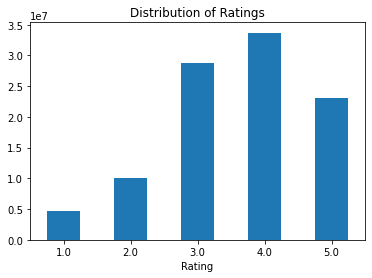

In [4]:
full.groupby('Rating').count()['MovieID'].plot(kind='bar',title='Distribution of Ratings',rot=360);

The frequency that each user appears in the dataset. It appears that most users rate relatively few movies for the most part. With a dataset well over 10,000,000 most users appear less than 50 times. This means there is very little individual data.

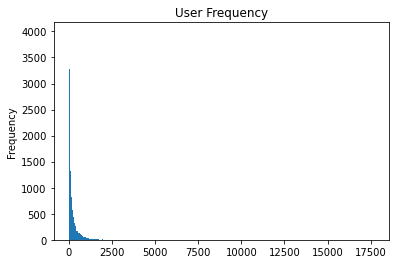

In [19]:
full.groupby('CustomerID').count()['MovieID'].plot(kind='hist',bins=17500,title='User Frequency',rot=360);

The mean and standard deviation of ratings.

In [20]:
pd.concat([full.mean().rename('Mean'), full.std().rename('Standard Deviations')], axis=1).drop(index=['CustomerID','MovieID'])

,Mean,Standard Deviations
Rating,3.604096,1.085088
